In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 1

### Hepatitis Dataset

In [318]:
data=pd.read_csv('hepatitis_csv.csv')
print(data.columns)
print(data.shape)
data.head()

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')
(155, 20)


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [319]:
mapping = {
    'male': 1,
    'female': 0,
    'live': 1,
    'die': 0
}

for column in data.columns:
    unique_values = data[column].unique()
    if set(unique_values).issubset(set(mapping.keys())):
        data[column] = data[column].map(mapping)
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,1
1,50,0,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,1
2,78,0,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,1
3,31,0,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,1
4,34,0,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,1


In [320]:
data = data.fillna(data.median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    int64  
 2   steroid          155 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          155 non-null    object 
 5   malaise          155 non-null    object 
 6   anorexia         155 non-null    object 
 7   liver_big        155 non-null    object 
 8   liver_firm       155 non-null    object 
 9   spleen_palpable  155 non-null    object 
 10  spiders          155 non-null    object 
 11  ascites          155 non-null    object 
 12  varices          155 non-null    object 
 13  bilirubin        155 non-null    float64
 14  alk_phosphate    155 non-null    float64
 15  sgot             155 non-null    float64
 16  albumin          155 non-null    float64
 17  protime         

In [321]:
X = data.drop('class', axis=1).to_numpy() 
y = data['class'].to_numpy()  

In [322]:
indices = np.arange(X.shape[0])
test_size = 0.2
split_index = int(X.shape[0] * (1 - test_size))

train_indices = indices[:split_index]
test_indices = indices[split_index:]

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

data.to_csv('hepatitis_clean.csv', index=False)

### Question 2

#### a. Construct a CSV file with the following attributes: Study time in hours of ML lab course (x) , Score out of 10 (y) , The dataset should contain 10 rows.

In [323]:
data = {
    'StudyTime': [1, 2, 3, 4, 5, 7, 8, 9, 11, 12], 
    'Score': [2, 3, 5, 6, 7, 8, 8, 9, 10, 11]       
}

df = pd.DataFrame(data)
df.to_csv('study_score.csv', index=False)

#### b. Create a regression model and display the following:Coefficients: B0 (intercept) and B1 (slope) , RMSE (Root Mean Square Error) , Predicted responses

In [324]:
X=df['StudyTime'].to_numpy()
Y=df['Score'].to_numpy()

#### Pedahzur Formula

In [325]:
b1_pedahzur=np.sum((X-X.mean())*(Y-Y.mean()))/np.sum((X-X.mean())**2)
b0_pedahzur=Y.mean()-(b1_pedahzur*X.mean())

y_pedahzur = b0_pedahzur + b1_pedahzur * X
squared_errors = (Y - y_pedahzur) ** 2
rmse_pedahzur = np.sqrt(np.mean(squared_errors))

print(f"{b1_pedahzur}x + {b0_pedahzur}")
print(y_pedahzur)
print(rmse_pedahzur)

0.7499999999999999x + 2.250000000000001
[ 3.    3.75  4.5   5.25  6.    7.5   8.25  9.   10.5  11.25]
0.6324555320336761


#### Calculus Method

In [326]:
mat1=np.array([[len(X),np.sum(X)],[np.sum(X),np.sum(X**2)]])
mat2=np.array([[np.sum(Y),np.sum(X*Y)]])
coeffs=np.dot(np.linalg.inv(mat1),mat2.T)
b0_mat,b1_mat=coeffs[0,0],coeffs[1,0]

y_mat = b0_mat + b1_mat * X
squared_errors = (Y - y_mat) ** 2
rmse_mat = np.sqrt(np.mean(squared_errors))

print(f"{b1_mat}x + {b0_mat}")
print(y_mat)
print(rmse_mat)

0.7500000000000004x + 2.2500000000000036
[ 3.    3.75  4.5   5.25  6.    7.5   8.25  9.   10.5  11.25]
0.6324555320336759


#### Predicted Output using sklearn

In [327]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['StudyTime']].values 
y = df['Score'].values 
model = LinearRegression()
model.fit(X, y)
B1 = model.coef_[0]
B0 = model.intercept_

y_sklearn = model.predict(X)
rmse_sklearn = np.sqrt(mean_squared_error(y, y_sklearn))


print(f"scikit-learn - B0 (Intercept): {B0}")
print(f"scikit-learn - B1 (Slope): {B1}")
print(y_sklearn)
print(rmse_sklearn)

scikit-learn - B0 (Intercept): 2.250000000000001
scikit-learn - B1 (Slope): 0.7499999999999999
[ 3.    3.75  4.5   5.25  6.    7.5   8.25  9.   10.5  11.25]
0.6324555320336761


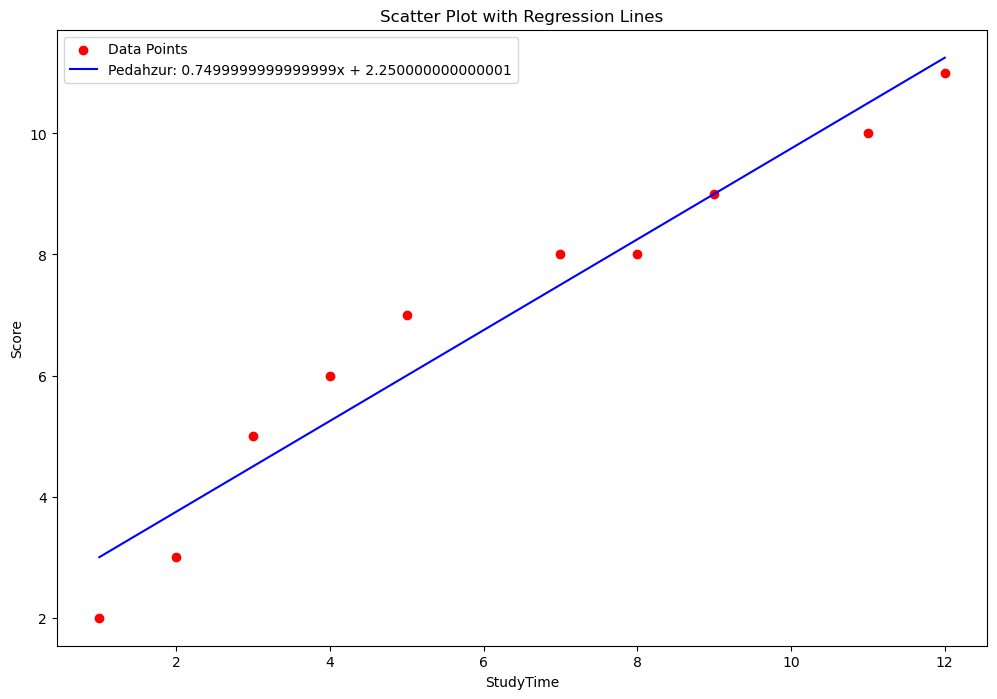

In [328]:
plt.figure(figsize=(12, 8))


plt.scatter(X, Y, color='red', label='Data Points')
plt.plot(X, y_pedahzur, color='blue', label=f'Pedahzur: {b1_pedahzur}x + {b0_pedahzur}')

plt.xlabel('StudyTime')
plt.ylabel('Score')
plt.title('Scatter Plot with Regression Lines')
plt.legend()
plt.show()

### Additional Question

In [329]:
df = pd.read_csv('hepatitis_clean.csv')
X = df['bilirubin'].to_numpy()  
Y = df['age'].to_numpy()  

In [330]:
b1_pedahzur=np.sum((X-X.mean())*(Y-Y.mean()))/np.sum((X-X.mean())**2)
b0_pedahzur=Y.mean()-(b1_pedahzur*X.mean())

y_pedahzur = b0_pedahzur + b1_pedahzur * X
squared_errors = (Y - y_pedahzur) ** 2
rmse_pedahzur = np.sqrt(np.mean(squared_errors))

print(f"{b1_pedahzur}x + {b0_pedahzur}")
print(y_pedahzur)
print(rmse_pedahzur)

1.215314417852649x + 39.48523056010082
[40.70054498 40.57901354 40.33595065 40.33595065 40.70054498 40.57901354
 40.70054498 40.70054498 40.33595065 40.70054498 41.0651393  40.70054498
 40.57901354 42.15892228 40.70054498 41.9158594  40.94360786 40.21441921
 40.33595065 40.33595065 40.57901354 40.94360786 40.70054498 40.57901354
 39.97135633 40.45748209 40.21441921 41.18667075 41.0651393  40.70054498
 42.28045372 40.70054498 40.33595065 40.09288777 40.57901354 40.21441921
 41.0651393  42.28045372 40.70054498 39.84982489 40.33595065 45.07567688
 40.70054498 40.33595065 40.70054498 40.33595065 40.21441921 41.67279651
 40.45748209 40.33595065 40.57901354 40.70054498 40.21441921 40.94360786
 40.33595065 40.45748209 40.70054498 40.33595065 40.70054498 40.70054498
 40.33595065 40.33595065 43.73883102 40.33595065 40.45748209 40.45748209
 40.33595065 44.46801967 40.70054498 41.42973363 40.45748209 42.88811093
 40.57901354 40.70054498 41.30820219 40.70054498 41.9158594  40.21441921
 40.70054498

In [331]:
mat1=np.array([[len(X),np.sum(X)],[np.sum(X),np.sum(X**2)]])
mat2=np.array([[np.sum(Y),np.sum(X*Y)]])
coeffs=np.dot(np.linalg.inv(mat1),mat2.T)
b0_mat,b1_mat=coeffs[0,0],coeffs[1,0]

y_mat = b0_mat + b1_mat * X
squared_errors = (Y - y_mat) ** 2
rmse_mat = np.sqrt(np.mean(squared_errors))

print(f"{b1_mat}x + {b0_mat}")
print(y_mat)
print(rmse_mat)

1.2153144178526603x + 39.485230560100796
[40.70054498 40.57901354 40.33595065 40.33595065 40.70054498 40.57901354
 40.70054498 40.70054498 40.33595065 40.70054498 41.0651393  40.70054498
 40.57901354 42.15892228 40.70054498 41.9158594  40.94360786 40.21441921
 40.33595065 40.33595065 40.57901354 40.94360786 40.70054498 40.57901354
 39.97135633 40.45748209 40.21441921 41.18667075 41.0651393  40.70054498
 42.28045372 40.70054498 40.33595065 40.09288777 40.57901354 40.21441921
 41.0651393  42.28045372 40.70054498 39.84982489 40.33595065 45.07567688
 40.70054498 40.33595065 40.70054498 40.33595065 40.21441921 41.67279651
 40.45748209 40.33595065 40.57901354 40.70054498 40.21441921 40.94360786
 40.33595065 40.45748209 40.70054498 40.33595065 40.70054498 40.70054498
 40.33595065 40.33595065 43.73883102 40.33595065 40.45748209 40.45748209
 40.33595065 44.46801967 40.70054498 41.42973363 40.45748209 42.88811093
 40.57901354 40.70054498 41.30820219 40.70054498 41.9158594  40.21441921
 40.700544

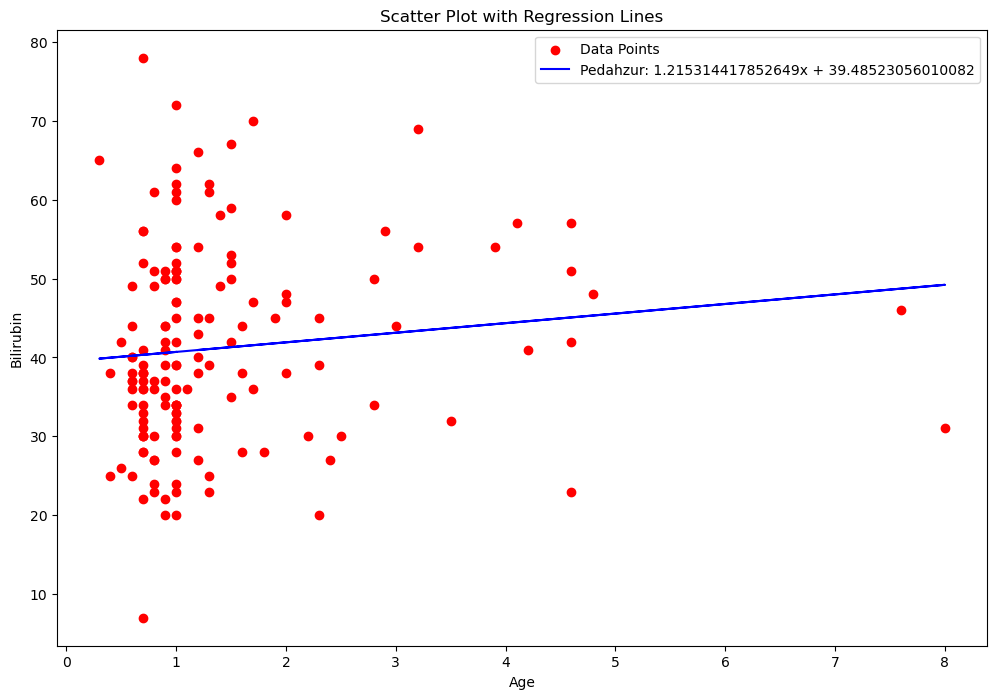

In [332]:
plt.figure(figsize=(12, 8))


plt.scatter(X, Y, color='red', label='Data Points')
plt.plot(X, y_pedahzur, color='blue', label=f'Pedahzur: {b1_pedahzur}x + {b0_pedahzur}')

plt.xlabel('Age')
plt.ylabel('Bilirubin')
plt.title('Scatter Plot with Regression Lines')
plt.legend()
plt.show()